# Exploring differences in social media movement and counter-movement discourse
## Analysing twitter data for black lives matter, blue lives matter, and all lives matter movements
By Ishita Singhal

## Introduction

**Provide a clear, written introduction to your topic.**

Over the past few years, social media platforms have become an important avenue for social activism. The larger goal of my research was to examine online social activism, focusing in particular on social media movements such as #BlackLivesMatter. Social media platforms like twitter are considered as outlets for people’s reactions, opinions, and beliefs. People employ these platforms and movements as a way to connect with a large audience, share information, raise awareness, mobilise action. The blacklivesmatter movements in particular have had a significant global, social impact, mobilising large communities and catalysing individuals as well as institutions to take reparative action. However, the advent of such movements has also given rise to anti-movements or counter-movements. For example, the hashtags #AllLivesMatter and #BlueLivesMatter came up as a response to #BlackLivesMatter. 

In order to understand the movement, as well as the motivations and goals of individuals participating in the movement, we need to analyse the language people use to express and communicate their views. My research question is thus as follows - How do social media movements and their counter movements differ in their online presence? Are there any patterns of commonalities or differences in the language employed by these differing movements?

**Demonstrate that you have identified a cultural pattern, clearly defining what you mean by "Culture," and why the signs you are studying belong to a conventionalized pattern.**	

In order to demonstrate online social movements as a cultural phenomenon, we must first explore the meaning of culture, and how this may be employed in a digital context. In his work ‘Doing Cultural Studies’, du Gay et al. (2013) describes mentions that culture can be considered both as a “whole way of life” as well as “the production and circulation of meaning”. It is the latter that he stresses on in particular, and it is this concept of culture that guides the present research as well. Here, culture is described as inextricably linked with meaning in society. Meaning is constructed through cultural practices. Moreover, by assigning meaning to something, we constitute it as a cultural artifact. Using du Gay et al.’s framework, online social media movements, and the hashtags associated with them are cultural artifacts as they “connect with a distinct set of social practices” (eg - on ground protests) and “associated with certain kinds of people” (racial identities, political beliefs etc.). The meanings, practices, and identities situate #blacklivesmatter, #alllivesmatter as cultural artifacts. 

Conventionalised patterns rely on shared meanings, and “collective representations”, as described by du Gay et al. The practice of using the hashtags on twitter follows a common purpose (expresses similar political sentiments, associated with the same behavioural practices - protests, instigated by similar set of events), and is employed by people from varying backgrounds (age, gender, race, political leanings etc.; Pew Research Centre, 2020) in the same way. Through the process of its usage, as well as through association with other cultural elements (semantic networks), the hashtags derive meaning, and become part of a cultural practice. 

Another aspect of consideration here is the question of how meaning is produced, circulated, and contested. This is the communication aspect of culture, and du Gay specifies that language is the medium through which the production and circulation of meaning takes place. Language signifies and represents things, but is also involved in the creation of meaning. This is why, in order to study the present cultural artifact, it is necessary to study the language associated with it - the language through which we may derive its meaning. Thus, the present study concerns itself with understanding the language used by social media movements and their counter movements, and to investigate patterns and comparisons in the language usage. 

**Identify the sign relations of the sign(s) you are studying in Peircean language, along with information about the object, sign-vehicle, and interpretant.**
The cultural phenomenon under study here is performance in online social activism, particularly participation in the black lives matter movement, and its counter movements (all lives matter and blue lives matter), through twitter. The hashtags #blacklivesmatter, #alllivesmatter, and #bluelivesmatter act as sign-vehicles, which points to an individual’s stance in the social movement (the object). Given the context provided by twitter as well as the general socio-political climate, one can subsequently interpret that the individual using the hashtag either supports the black lives/all lives/blue lives matter movement. The tweet in its entirety provides additional context, and can even reflect an individual's sentiments, their level of arousal, as well as beliefs. In this regard, the primary sign-relation represented by the use of the various BLM hashtags, is a dicent indexical legisign relation, as the tweets (and hashtag) index peoples opinions, in the actual context of the social media environment, and the social movement. Moreover, every instantiation of the hashtag in a tweet represents a replica of the tweet legisign. 


## Data Analysis

### Topic Modelling

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling
    !pip install plotly
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install gensim
    !pip install chart_studio
    !pip install --upgrade autopep8
    !pip install -U gensim

ModuleNotFoundError: No module named 'google'

In [4]:
# Required Libraries

#Base and Cleaning 
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
from collections import Counter

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import pyLDAvis.gensim
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

ModuleNotFoundError: No module named 'emoji'

In [ ]:
#Reads all the tweets and isolates the tweets that in English
black_lives_matter_df = pd.read_csv('/content/drive/MyDrive/black_lives_matter.csv')
black_lives_matter_df = black_lives_matter_df.loc[black_lives_matter_df['lang'] == 'en'] 
blue_lives_matter_df = pd.read_csv('/content/drive/MyDrive/blue_lives_matter.csv')
blue_lives_matter_df = blue_lives_matter_df.loc[blue_lives_matter_df['lang'] == 'en']
all_lives_matter_df = pd.read_csv('/content/drive/MyDrive/all_lives_matter.csv')
all_lives_matter_df = all_lives_matter_df.loc[all_lives_matter_df['lang'] == 'en']

### All Lives Matter

In [ ]:
all_lives_matter_df.dropna(inplace=True)

In [ ]:
all_lives_matter_df.reset_index(drop=True,inplace=True)

In [ ]:
def give_emoji_free_text(text):
    """
    Removes all emojis from tweets
    """
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\u200d"
                       u"\u2640-\u2642" 
                       "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def url_free_text(text):
    '''
    Cleans urls from text
    '''
    text = re.sub(r'http\S+', '', text)
    return text

def tokenize(text):
    # Removing url's
    import string
    pattern = r"https?\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub(r'@\w+|#\w+', '', tokens) # Remove @ ! $
    tokens = re.sub('[^a-zA-Z 0-9]', '', tokens)
    tokens = ' '.join(w for w in tokens.split() if len(w)>3)
    tokens = tokens.translate(str.maketrans('', '', string.punctuation))
    tokens = ' '.join(w for w in tokens.split() if not any(x.isdigit() for x in w))

    tokens = tokens.lower() # Make text lowercase
    
    return tokens

# Apply the function above and get tweets free of emoji's
call_emoji_free = lambda x: give_emoji_free_text(x)

# Apply `call_emoji_free` which calls the function to remove all emoji's
all_lives_matter_df['emoji_free_tweets'] = all_lives_matter_df['text'].apply(call_emoji_free)

all_lives_matter_df['clean_tweets'] = all_lives_matter_df['emoji_free_tweets'].apply(tokenize)

#Create a new column with url free tweets
all_lives_matter_df['url_free_tweets'] = all_lives_matter_df['clean_tweets'].apply(url_free_text)


In [ ]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Custom stopwords
custom_stopwords = ['hi','\n','\n\n', '&amp;', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'like', '$', '@']

# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)

# ALL_STOP_WORDS = spacy + gensim + wordcloud
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)


tokens = []

for doc in tokenizer.pipe(all_lives_matter_df['url_free_tweets'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

# Makes tokens column
all_lives_matter_df['tokens'] = tokens

In [ ]:
# Make tokens a string again
all_lives_matter_df['tokens_back_to_text'] = [' '.join(map(str, l)) for l in all_lives_matter_df['tokens']]

def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []

    if(text == ''):
      return None

    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

all_lives_matter_df['lemmas'] = all_lives_matter_df['tokens_back_to_text'].apply(get_lemmas)

In [ ]:
all_lives_matter_df.dropna(inplace=True)

In [ ]:
# Make lemmas a string again
all_lives_matter_df['lemmas_back_to_text'] = [' '.join(map(str, l)) for l in all_lives_matter_df['lemmas']]

# Tokenizer function
def split_string(text):
  return [w for w in text.split() if len(w)>1]

# Apply tokenizer
all_lives_matter_df['lemma_tokens'] = all_lives_matter_df['lemmas_back_to_text'].apply(split_string)

In [ ]:
id2word = Dictionary(all_lives_matter_df['lemma_tokens'])

In [ ]:
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)

In [ ]:
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in all_lives_matter_df['lemma_tokens']]

In [ ]:
# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=3, id2word=id2word, workers=12, passes=5)

In [ ]:
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

In [ ]:
# Create Topics
topics = [' '.join(t[0:10]) for t in words]

In [ ]:
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

In [ ]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=all_lives_matter_df['lemma_tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)


Perplexity:  -7.04151171358764

Coherence Score:  0.2923055376884232


### All Lives Matter Topics 

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(base_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.108694  0.134250       1        1  41.010281
0     -0.085268 -0.145513       2        1  30.549068
1      0.193961  0.011263       3        1  28.440650, topic_info=               Term          Freq         Total Category  logprob  loglift
15           matter  13510.000000  13510.000000  Default  30.0000  30.0000
14             live   8003.000000   8003.000000  Default  29.0000  29.0000
85             know   3062.000000   3062.000000  Default  28.0000  28.0000
45            black   5772.000000   5772.000000  Default  27.0000  27.0000
19             life   7916.000000   7916.000000  Default  26.0000  26.0000
..              ...           ...           ...      ...      ...      ...
0    alllivesmatter    296.066867    731.527374   Topic3  -5.6111   0.3528
137             say    339.991074   2869.627770   Topic3  -5.4727  -0.8757
413            help    293.584344    867.136555   Topic3  -5.6195   0.1743
268           think    292.910286   1130.702047   Topic3  -5.6218  -0.0934
19             life    286.987541   7916.062966   Topic3  -5.6422  -2.0599

[259 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
210       1  0.007105  accountable
210       3  0.994719  accountable
1934      1  0.977535     activism
1934      2  0.017302     activism
63        1  0.011153       advise
...     ...       ...          ...
52        3  0.669838        wrong
1266      1  0.258491         year
1266      2  0.170276         year
1266      3  0.570321         year
4214      1  0.976219      yoooooo

[513 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])



### Black Lives Matter

In [ ]:
black_lives_matter_df.dropna(inplace=True)

In [ ]:
black_lives_matter_df.reset_index(drop=True,inplace=True)

In [ ]:
def give_emoji_free_text(text):
    """
    Removes all emojis from tweets
    """
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\u200d"
                       u"\u2640-\u2642" 
                       "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def url_free_text(text):
    '''
    Cleans urls from text
    '''
    text = re.sub(r'http\S+', '', text)
    return text

def tokenize(text):
    # Removing url's
    import string
    pattern = r"https?\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub(r'@\w+|#\w+', '', tokens) # Remove @ ! $
    tokens = re.sub('[^a-zA-Z 0-9]', '', tokens)
    tokens = ' '.join(w for w in tokens.split() if len(w)>3)
    tokens = tokens.translate(str.maketrans('', '', string.punctuation))
    tokens = ' '.join(w for w in tokens.split() if not any(x.isdigit() for x in w))

    tokens = tokens.lower() # Make text lowercase
    
    return tokens

# Apply the function above and get tweets free of emoji's
call_emoji_free = lambda x: give_emoji_free_text(x)

# Apply `call_emoji_free` which calls the function to remove all emoji's
black_lives_matter_df['emoji_free_tweets'] = black_lives_matter_df['text'].apply(call_emoji_free)

black_lives_matter_df['clean_tweets'] = black_lives_matter_df['emoji_free_tweets'].apply(tokenize)

#Create a new column with url free tweets
black_lives_matter_df['url_free_tweets'] = black_lives_matter_df['clean_tweets'].apply(url_free_text)


In [ ]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Custom stopwords
custom_stopwords = ['hi','\n','\n\n', '&amp;', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'like', '$', '@']

# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)

# ALL_STOP_WORDS = spacy + gensim + wordcloud
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)


tokens = []

for doc in tokenizer.pipe(black_lives_matter_df['url_free_tweets'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

# Makes tokens column
black_lives_matter_df['tokens'] = tokens

In [ ]:
# Make tokens a string again
black_lives_matter_df['tokens_back_to_text'] = [' '.join(map(str, l)) for l in black_lives_matter_df['tokens']]

def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []

    if(text == ''):
      return None

    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

black_lives_matter_df['lemmas'] = black_lives_matter_df['tokens_back_to_text'].apply(get_lemmas)

In [ ]:
black_lives_matter_df.dropna(inplace=True)

In [ ]:
# Make lemmas a string again
black_lives_matter_df['lemmas_back_to_text'] = [' '.join(map(str, l)) for l in black_lives_matter_df['lemmas']]

# Tokenizer function
def split_string(text):
  return [w for w in text.split() if len(w)>1]

# Apply tokenizer
black_lives_matter_df['lemma_tokens'] = black_lives_matter_df['lemmas_back_to_text'].apply(split_string)

In [ ]:
id2word = Dictionary(black_lives_matter_df['lemma_tokens'])

In [ ]:
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)

In [ ]:
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in black_lives_matter_df['lemma_tokens']]

In [ ]:
# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=3, id2word=id2word, workers=12, passes=5)

In [ ]:
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

In [ ]:
# Create Topics
topics = [' '.join(t[0:10]) for t in words]

In [ ]:
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
black people not go protest stand police today take sign

------ Topic 1 ------
black not matter white life video people live police look

------ Topic 2 ------
protest not police know need kill stop justice today black



In [ ]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=black_lives_matter_df['lemma_tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)


Perplexity:  -7.715033335972909

Coherence Score:  0.1760871321006033


### Black Lives Matter Topics

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(base_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.092842  0.130001       1        1  36.317689
0     -0.082018 -0.135479       2        1  32.319911
2      0.174861  0.005478       3        1  31.362400, topic_info=         Term         Freq        Total Category  logprob  loglift
94    protest  4373.000000  4373.000000  Default  30.0000  30.0000
103    matter  2280.000000  2280.000000  Default  29.0000  29.0000
99      black  7280.000000  7280.000000  Default  28.0000  28.0000
268      life  2193.000000  2193.000000  Default  27.0000  27.0000
368      look   950.000000   950.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
336    murder   442.307797  1418.874369   Topic3  -5.5134  -0.0061
541      feel   372.385300   535.218081   Topic3  -5.6855   0.7968
73   movement   395.627697  1153.096445   Topic3  -5.6250   0.0898
2       white   409.695718  2466.760721   Topic3  -5.5900  -0.6357
243    people   410.707721  3389.901303   Topic3  -5.5876  -0.9511

[285 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1629      3  0.994549  activista
377       2  0.975547    afandor
1429      1  0.004568  airbender
1429      2  0.972885  airbender
1429      3  0.022838  airbender
...     ...       ...        ...
257       3  0.528640       year
4225      2  0.994401      youim
1790      1  0.977432       zone
1790      2  0.015850       zone
1790      3  0.005283       zone

[608 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

### Blue Lives Matter

In [ ]:
blue_lives_matter_df.dropna(inplace=True)

In [ ]:
blue_lives_matter_df.reset_index(drop=True,inplace=True)

In [ ]:
def give_emoji_free_text(text):
    """
    Removes all emojis from tweets
    """
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\u200d"
                       u"\u2640-\u2642" 
                       "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def url_free_text(text):
    '''
    Cleans urls from text
    '''
    text = re.sub(r'http\S+', '', text)
    return text

def tokenize(text):
    # Removing url's
    import string
    pattern = r"https?\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub(r'@\w+|#\w+', '', tokens) # Remove @ ! $
    tokens = re.sub('[^a-zA-Z 0-9]', '', tokens)
    tokens = ' '.join(w for w in tokens.split() if len(w)>3)
    tokens = tokens.translate(str.maketrans('', '', string.punctuation))
    tokens = ' '.join(w for w in tokens.split() if not any(x.isdigit() for x in w))

    tokens = tokens.lower() # Make text lowercase
    
    return tokens

# Apply the function above and get tweets free of emoji's
call_emoji_free = lambda x: give_emoji_free_text(x)

# Apply `call_emoji_free` which calls the function to remove all emoji's
blue_lives_matter_df['emoji_free_tweets'] = blue_lives_matter_df['text'].apply(call_emoji_free)

blue_lives_matter_df['clean_tweets'] = blue_lives_matter_df['emoji_free_tweets'].apply(tokenize)

#Create a new column with url free tweets
blue_lives_matter_df['url_free_tweets'] = blue_lives_matter_df['clean_tweets'].apply(url_free_text)


In [ ]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Custom stopwords
custom_stopwords = ['hi','\n','\n\n', '&amp;', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'like', '$', '@']

# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)

# ALL_STOP_WORDS = spacy + gensim + wordcloud
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)


tokens = []

for doc in tokenizer.pipe(blue_lives_matter_df['url_free_tweets'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

# Makes tokens column
blue_lives_matter_df['tokens'] = tokens

In [ ]:
# Make tokens a string again
blue_lives_matter_df['tokens_back_to_text'] = [' '.join(map(str, l)) for l in blue_lives_matter_df['tokens']]

def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []

    if(text == ''):
      return None

    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

blue_lives_matter_df['lemmas'] = blue_lives_matter_df['tokens_back_to_text'].apply(get_lemmas)

In [ ]:
blue_lives_matter_df.dropna(inplace=True)

In [ ]:
# Make lemmas a string again
blue_lives_matter_df['lemmas_back_to_text'] = [' '.join(map(str, l)) for l in blue_lives_matter_df['lemmas']]

# Tokenizer function
def split_string(text):
  return [w for w in text.split() if len(w)>1]

# Apply tokenizer
blue_lives_matter_df['lemma_tokens'] = blue_lives_matter_df['lemmas_back_to_text'].apply(split_string)

In [ ]:
id2word = Dictionary(blue_lives_matter_df['lemma_tokens'])

In [ ]:
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)

In [ ]:
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in blue_lives_matter_df['lemma_tokens']]

In [ ]:
# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=3, id2word=id2word, workers=12, passes=5)

In [ ]:
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

In [ ]:
# Create Topics
topics = [' '.join(t[0:10]) for t in words]

In [ ]:
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
matter police not live life blue people kill black thank

------ Topic 1 ------
kill shoot police officer cop support rest peace black white

------ Topic 2 ------
officer police hero not shoot family blue prayer story respect



In [ ]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=blue_lives_matter_df['lemma_tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)


Perplexity:  -7.284783616352217

Coherence Score:  0.2099047239485515


### Blue Lives Matter Topics

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(base_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.024003 -0.135084       1        1  34.716000
2     -0.134609  0.047708       2        1  34.632595
0      0.110606  0.087376       3        1  30.651405, topic_info=        Term         Freq        Total Category  logprob  loglift
39   officer  6779.000000  6779.000000  Default  30.0000  30.0000
278      cop  1714.000000  1714.000000  Default  29.0000  29.0000
15      live  1415.000000  1415.000000  Default  28.0000  28.0000
58    matter  1793.000000  1793.000000  Default  27.0000  27.0000
86   support  1428.000000  1428.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
50     shoot   530.413995  3887.891536   Topic3  -4.9700  -0.8095
6     murder   343.004390  1138.536970   Topic3  -5.4059  -0.0173
48      rest   369.044040  1859.759242   Topic3  -5.3328  -0.4348
47     peace   351.944891  1725.956312   Topic3  -5.3802  -0.4076
38      hero   357.958728  1961.032550   Topic3  -5.3633  -0.5183

[260 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
18        1  0.020998   absurdity
18        2  0.986886   absurdity
4442      1  0.957292  abusersfbi
491       1  0.005911      africa
491       2  0.993057      africa
...     ...       ...         ...
555       2  0.846611        york
555       3  0.024388        york
366       1  0.056647        zone
366       2  0.011329        zone
366       3  0.929009        zone

[538 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

### General inquirer dictionary

In [ ]:
!pip install tweet-preprocessor

In [ ]:
#Import all the libraries needed
import pandas as pd
import tweepy
import json
import time
import nltk
import re, string, unicodedata
import matplotlib.pyplot as plt
import string
import preprocessor as p
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
import numpy as np

In [ ]:
#Options needed to display pandas dataframes completely
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 2000)

In [ ]:
# NLTK dependencies needed for Lemmatizing et al
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [ ]:
#Reads all the tweets and isolates the tweets that in English
black_lives_matter_df = pd.read_csv('/content/drive/MyDrive/black_lives_matter.csv')
black_lives_matter_df = black_lives_matter_df.loc[black_lives_matter_df['lang'] == 'en'] 
blue_lives_matter_df = pd.read_csv('/content/drive/MyDrive/blue_lives_matter.csv')
blue_lives_matter_df = blue_lives_matter_df.loc[blue_lives_matter_df['lang'] == 'en']
all_lives_matter_df = pd.read_csv('/content/drive/MyDrive/all_lives_matter.csv')
all_lives_matter_df = all_lives_matter_df.loc[all_lives_matter_df['lang'] == 'en']

In [ ]:
def write_json(file_object,each_json):
  '''
  Dumps the object as JSON and then write it to the file
  '''
  string_json = json.dumps(each_json)
  file_object.write(string_json)
  file_object.write('\n')

def read_json(filename):
  '''
  Open the JSON file, read and parse it line by line.
  '''
  with open(filename,'r') as infile:
    file_contents = infile.readlines()
    all_json_objects = []
    for each_object in file_contents:
      json_object = json.loads(each_object)
      all_json_objects.append(json_object)
    return all_json_objects

#### Tweet preprocessing

In the following steps, we will be cleaning and processing the tweets to remove tweet specific issues (mentions, hashtags, emoticons etc.) as well as general language cleaning (lower case, punctuation etc.).

In [ ]:
#Initialise the lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_tweet(row, lemmatizer):
    text = row['text']
    text = p.clean(text) #Clean the text for all urls, emojis, etc
    text = ' '.join(w for w in text.split() if len(w)>1) #Removes words with one letter
    token_list = []
    for word, tag in pos_tag(word_tokenize(text)): #Tokenize and POS tag words so lemmatizing happens properly
      wntag = tag[0].lower()
      wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
      if not wntag:
        lemma = word #Lemmatizing not required if a POS tag isn't present
      else:
        lemma = lemmatizer.lemmatize(word, wntag) #Lemmatize the word
      token_list.append(lemma)
    # We use lemmatizing and not stemming as we require correct words when we use the LWIC dictionary
    return ' '.join(token_list)

In [ ]:
#Cleans the tweet texts for all 3 dfs
black_lives_matter_df['text'] = black_lives_matter_df.apply(lambda x: preprocess_tweet(x,lemmatizer), axis=1)
black_lives_matter_df['text'] = black_lives_matter_df['text'].str.lower().str.replace(r'[^\w\s]',' ').str.replace(r'\s\s+', ' ')
black_lives_matter_df.drop_duplicates(subset = ['text'], inplace = True)
black_lives_matter_df.dropna(inplace = True)

In [ ]:
blue_lives_matter_df['text'] = blue_lives_matter_df.apply(lambda x: preprocess_tweet(x,lemmatizer), axis=1)
blue_lives_matter_df['text'] = blue_lives_matter_df['text'].str.lower().str.replace(r'[^\w\s]',' ').str.replace(r'\s\s+', ' ')
blue_lives_matter_df.drop_duplicates(subset = ['text'], inplace = True)
blue_lives_matter_df.dropna(inplace = True)

In [ ]:
all_lives_matter_df['text'] = all_lives_matter_df.apply(lambda x: preprocess_tweet(x,lemmatizer), axis=1)
all_lives_matter_df['text'] = all_lives_matter_df['text'].str.lower().str.replace(r'[^\w\s]',' ').str.replace(r'\s\s+', ' ')
all_lives_matter_df.drop_duplicates(subset = ['text'], inplace = True)
all_lives_matter_df.dropna(inplace = True)

In [ ]:
blue_lives_matter_df.shape

(22134, 4)

In [ ]:
all_lives_matter_df.shape

(31159, 4)

In [ ]:
black_lives_matter_df.shape

(27981, 4)

#### Dictionary Work

Now we will load the dictionaries and try to see if the tweets have a significant number of the words in the dictionaries.

In [ ]:
dictionary_words = pd.read_excel('/content/inquirerbasic.xls')  

/usr/local/lib/python3.7/dist-packages/xlrd/book.py:74: DeprecationWarning:

time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead

/usr/local/lib/python3.7/dist-packages/xlrd/book.py:89: DeprecationWarning:

time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead

/usr/local/lib/python3.7/dist-packages/xlrd/book.py:130: DeprecationWarning:

time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead



In [ ]:
#Removing one False value from the Entry column
dictionary_words = dictionary_words.loc[dictionary_words.Entry != False]

In [ ]:
def process_text(text):
  '''
  Procss the Text and clean it
  '''
  text = text.lower()
  text = text.replace(r'#\w+','')
  return text  

In [ ]:
dictionary_words['clean_entry'] = dictionary_words.Entry.apply(lambda x: process_text(x))
dictionary_words.drop_duplicates(subset=['clean_entry'],inplace=True)

In [ ]:
#Isolate the words from columns we are interested in
powTot_df = dictionary_words.loc[dictionary_words['PowTot'] == 'PowTot']
RcTot_df = dictionary_words.loc[dictionary_words['RcTot'] == 'RcTot']

In [ ]:
positive_powTot_df = powTot_df.loc[powTot_df['Positiv'] == 'Positiv']
negative_powTot_df = powTot_df.loc[powTot_df['Negativ'] == 'Negativ']
#Further subdivision into positiv and negativ words for further analysis
positive_rcTot_df = RcTot_df.loc[RcTot_df['Positiv'] == 'Positiv']
negative_rcTot_df = RcTot_df.loc[RcTot_df['Negativ'] == 'Negativ']

In [ ]:
powTot_words = powTot_df['clean_entry'].values
RcTot_words = RcTot_df['clean_entry'].values
#Subdivision into 4 sections of Rc and Pow with positiv and negativ
positive_powTot_words = positive_powTot_df['clean_entry'].values
positive_rcTot_words = positive_rcTot_df['clean_entry'].values

negative_powTot_words = negative_powTot_df['clean_entry'].values
negative_rcTot_words = negative_rcTot_df['clean_entry'].values

In [ ]:
def check_if_pow_exists(text):
  '''
  Checks if power words exist in the text, if so, counts number of words that exist.
  '''
  total_words = 0
  tokens = word_tokenize(text)
  for each_token in tokens:
    if each_token in powTot_words:
      total_words += 1
  return total_words

def check_if_rc_exists(text):
  '''
  Checks if rectitude words exist in the text, if so, counts number of words that exist.
  '''
  total_words = 0
  tokens = word_tokenize(text)
  for each_token in tokens:
    if each_token in RcTot_words:
      total_words += 1
  return total_words

def check_if_positive_exists(text):
  '''
  Checks if positive words exist in the text, if so, counts number of words that exist.
  '''
  total_words = 0
  tokens = word_tokenize(text)
  for each_token in tokens:
    if each_token in positive_powTot_words or each_token in positive_rcTot_words:
      total_words += 1
  return total_words

def check_if_negative_exists(text):
  '''
  Checks if negative words exist in the text, if so, counts number of words that exist.
  '''
  total_words = 0
  tokens = word_tokenize(text)
  for each_token in tokens:
    if each_token in negative_powTot_words or each_token in negative_rcTot_words:
      total_words += 1
  return total_words

def get_values(df,column):
  '''
  If column is to be split into boolean categories, counts number of items in each category and returns it
  '''
  nonzero_values = df.loc[df[column] > 0]
  zero_values = df.loc[df[column] == 0]
  return [nonzero_values.shape[0], zero_values.shape[0]]

def construct_list(name,df, column_list):
  '''
  Constructs list that can be used for plotting, given name, df, and the list of columns that need to be processed
  '''
  constructed_list = [name]
  zero_list = []
  for each_column in column_list:
    nonzero_values, zero_values = get_values(df, each_column)
    constructed_list.append(nonzero_values)
    zero_list.append(zero_values)
  all_zero_values = sum([int(x) for x in zero_list])
  constructed_list.append(all_zero_values)
  return constructed_list

def get_other_values(df,column):
  '''
  Gets values of column, and then counts number of times each value is entered
  '''
  final_dict = {}
  column_values = list(df[column].value_counts().keys())
  for each_value in column_values:
    values = df.loc[df[column] == each_value]
    final_dict[each_value] = values.shape[0]
  return final_dict

def count_words(text):
  tokens = word_tokenize(text)
  return len(tokens)

In [ ]:
#Calculate the number of words for each df for all 4 categories
black_lives_matter_df['powTot'] = black_lives_matter_df.text.apply(lambda x: check_if_pow_exists(x))
black_lives_matter_df['rcTot'] = black_lives_matter_df.text.apply(lambda x: check_if_rc_exists(x))
black_lives_matter_df['positiv'] = black_lives_matter_df.text.apply(lambda x: check_if_positive_exists(x))
black_lives_matter_df['negativ'] = black_lives_matter_df.text.apply(lambda x: check_if_negative_exists(x))

In [ ]:
blue_lives_matter_df['powTot'] = blue_lives_matter_df.text.apply(lambda x: check_if_pow_exists(x))
blue_lives_matter_df['rcTot'] = blue_lives_matter_df.text.apply(lambda x: check_if_rc_exists(x))
blue_lives_matter_df['positiv'] = blue_lives_matter_df.text.apply(lambda x: check_if_positive_exists(x))
blue_lives_matter_df['negativ'] = blue_lives_matter_df.text.apply(lambda x: check_if_negative_exists(x))

In [ ]:
all_lives_matter_df['powTot'] = all_lives_matter_df.text.apply(lambda x: check_if_pow_exists(x))
all_lives_matter_df['rcTot'] = all_lives_matter_df.text.apply(lambda x: check_if_rc_exists(x))
all_lives_matter_df['positiv'] = all_lives_matter_df.text.apply(lambda x: check_if_positive_exists(x))
all_lives_matter_df['negativ'] = all_lives_matter_df.text.apply(lambda x: check_if_negative_exists(x))

In [ ]:
blm_list = construct_list('Black Lives Matter', black_lives_matter_df, ['powTot', 'rcTot'])
alm_list = construct_list('All Lives Matter', all_lives_matter_df, ['powTot', 'rcTot'])
bluelm_list = construct_list('Blue Lives Matter', blue_lives_matter_df, ['powTot', 'rcTot'])

In [ ]:
final_df = pd.DataFrame([blm_list,alm_list,bluelm_list],columns=['Name','PowTot','RcTot','Neither'])

      PowTot     RcTot    Neither                Name
0  16.627354  5.276795  78.095851  Black Lives Matter
1  11.704483  5.661286  82.634231    All Lives Matter
2  23.289961  6.828861  69.881178   Blue Lives Matter


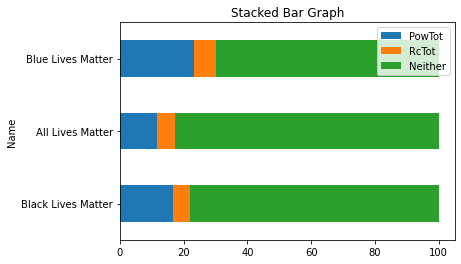

In [ ]:
df_total = final_df["PowTot"] + final_df["RcTot"] + final_df["Neither"] 
df_rel = final_df[final_df.columns[1:]].div(df_total, 0)*100
df_rel['Name'] = ['Black Lives Matter','All Lives Matter','Blue Lives Matter']
# plot a Stacked Bar Chart using matplotlib 
df_rel.plot( 
    x = 'Name', 
    kind = 'barh', 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True) 
 
print(df_rel)

In [ ]:
pow_blm = get_other_values(black_lives_matter_df,'powTot')
pow_alm = get_other_values(all_lives_matter_df,'powTot')
pow_bluelm = get_other_values(blue_lives_matter_df,'powTot')

In [ ]:
pow_blm[7] = 0 #To even out number of columns

In [ ]:
#Prepare df for plotting
all_list = []
all_list.append(['Black Lives Matter', pow_blm[0], pow_blm[1], pow_blm[2], pow_blm[3], pow_blm[4], pow_blm[5], pow_blm[6],pow_blm[7]])
all_list.append(['All Lives Matter', pow_alm[0], pow_alm[1], pow_alm[2], pow_alm[3], pow_alm[4], pow_alm[5], pow_alm[6],pow_alm[7]])
all_list.append(['Blue Lives Matter', pow_bluelm[0], pow_bluelm[1], pow_bluelm[2], pow_bluelm[3], pow_bluelm[4], pow_bluelm[5], pow_bluelm[6],pow_bluelm[7]])
pow_df = pd.DataFrame(all_list, columns=['Name','0 PoW','1 PoW','2 PoW','3 PoW','4 PoW','5 PoW','6 PoW','7 PoW'])

       0 PoW      1 PoW      2 PoW     3 PoW     4 PoW     5 PoW     6 PoW     7 PoW                Name
0  66.745291  24.069905   7.190594  1.622530  0.303778  0.042886  0.025017  0.000000  Black Lives Matter
1  76.591033  17.943451   4.377547  0.869733  0.170095  0.032093  0.009628  0.006419    All Lives Matter
2  53.420078  28.756664  13.196892  3.736333  0.745459  0.121984  0.018072  0.004518   Blue Lives Matter


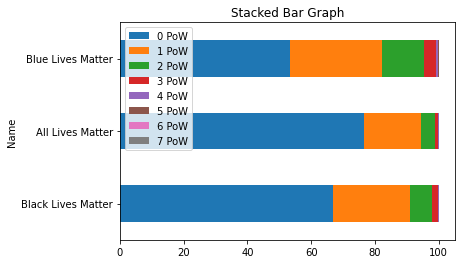

In [ ]:
df_total = pow_df["0 PoW"] + pow_df["1 PoW"] + pow_df["2 PoW"] + pow_df["3 PoW"] + pow_df["4 PoW"] + pow_df["5 PoW"] + pow_df["6 PoW"] + pow_df["7 PoW"] 
df_rel = pow_df[pow_df.columns[1:]].div(df_total, 0)*100 #Calculate % values because each df has different number of rows
df_rel['Name'] = ['Black Lives Matter','All Lives Matter','Blue Lives Matter']
# plot a Stacked Bar Chart using matplotlib 
df_rel.plot( 
    x = 'Name', 
    kind = 'barh', 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True) 
 
print(df_rel)

In [ ]:
rc_blm = get_other_values(black_lives_matter_df,'rcTot')
rc_alm = get_other_values(all_lives_matter_df,'rcTot') #Get values for rcToT
rc_bluelm = get_other_values(blue_lives_matter_df,'rcTot')

In [ ]:
rc_alm[6] = 0
rc_bluelm[6] = 0 #To even out the columns

In [ ]:
#Prepare data for plotting
all_list = []
all_list.append(['Black Lives Matter', rc_blm[0], rc_blm[1], rc_blm[2], rc_blm[3], rc_blm[4], rc_blm[6]])
all_list.append(['All Lives Matter', rc_alm[0], rc_alm[1], rc_alm[2], rc_alm[3], rc_alm[4], rc_alm[6]])
all_list.append(['Blue Lives Matter', rc_bluelm[0], rc_bluelm[1], rc_bluelm[2], rc_bluelm[3], rc_bluelm[4], rc_bluelm[6]])
rc_df = pd.DataFrame(all_list, columns=['Name','0 RcW','1 RcW','2 RcW','3 RcW','4 RcW','6 RcW'])

       0 RcW      1 RcW     2 RcW     3 RcW     4 RcW     6 RcW                Name
0  89.446410   9.295593  1.129338  0.114363  0.010722  0.003574  Black Lives Matter
1  88.677429  10.067717  1.087968  0.150839  0.016047  0.000000    All Lives Matter
2  86.342279  12.288786  1.296648  0.063251  0.009036  0.000000   Blue Lives Matter


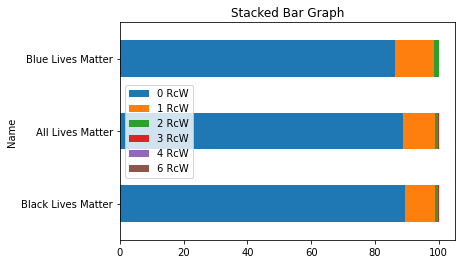

In [ ]:
df_total = rc_df["0 RcW"] + rc_df["1 RcW"] + rc_df["2 RcW"] + rc_df["3 RcW"] + rc_df["4 RcW"] + rc_df["6 RcW"] 
df_rel = rc_df[rc_df.columns[1:]].div(df_total, 0)*100
df_rel['Name'] = ['Black Lives Matter','All Lives Matter','Blue Lives Matter']
# plot a Stacked Bar Chart using matplotlib 
df_rel.plot( 
    x = 'Name', 
    kind = 'barh', 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True) 
 
print(df_rel)

In [ ]:
#Isolating just power words.
blm_pow = black_lives_matter_df.loc[black_lives_matter_df['powTot']> 0]
bluelm_pow = blue_lives_matter_df.loc[blue_lives_matter_df['powTot']> 0]
alm_pow = all_lives_matter_df.loc[all_lives_matter_df['powTot']>0]

In [ ]:
#Calculating % of positive power words, % of negative power words, % of neutral power words
blm_pow['positive_percentage'] = blm_pow.apply(lambda x: x['positiv']/x['powTot'],axis=1)
blm_pow['negative_percentage'] = blm_pow.apply(lambda x: x['negativ']/x['powTot'],axis=1)
blm_pow['neutral_percentage'] = blm_pow.apply(lambda x: (x['powTot']-(x['positiv']+x['negativ']))/x['powTot'],axis=1)

In [ ]:
#Calculating % of positive power words, % of negative power words, % of neutral power words
bluelm_pow['positive_percentage'] = bluelm_pow.apply(lambda x: x['positiv']/x['powTot'],axis=1)
bluelm_pow['negative_percentage'] = bluelm_pow.apply(lambda x: x['negativ']/x['powTot'],axis=1)
bluelm_pow['neutral_percentage'] = bluelm_pow.apply(lambda x: (x['powTot']-(x['positiv']+x['negativ']))/x['powTot'],axis=1)

In [ ]:
#Calculating % of positive power words, % of negative power words, % of neutral power words
alm_pow['positive_percentage'] = alm_pow.apply(lambda x: x['positiv']/x['powTot'],axis=1)
alm_pow['negative_percentage'] = alm_pow.apply(lambda x: x['negativ']/x['powTot'],axis=1)
alm_pow['neutral_percentage'] = alm_pow.apply(lambda x: (x['powTot']-(x['positiv']+x['negativ']))/x['powTot'],axis=1)

In [ ]:
#Preparing data to plot
blm_sentiment = ['Black Lives Matter', blm_pow['positive_percentage'].mean()*100,blm_pow['negative_percentage'].mean()*100,blm_pow['neutral_percentage'].mean()*100 ]
alm_sentiment = ['All Lives Matter', alm_pow['positive_percentage'].mean()*100,alm_pow['negative_percentage'].mean()*100,alm_pow['neutral_percentage'].mean()*100 ]
bluelm_sentiment = ['Blue Lives Matter', bluelm_pow['positive_percentage'].mean()*100, bluelm_pow['negative_percentage'].mean()*100, bluelm_pow['neutral_percentage'].mean()*100 ]

In [ ]:
final_df = pd.DataFrame([blm_sentiment,alm_sentiment,bluelm_sentiment],columns=['Name','Positive Words %', 'Negative Words %', 'Neutral Words %'])

                 Name  Positive Words %  Negative Words %  Neutral Words %
0  Black Lives Matter         15.600573         11.169085        73.230342
1    All Lives Matter         13.466123         17.246628        69.287248
2   Blue Lives Matter          9.718812         11.309108        78.972080


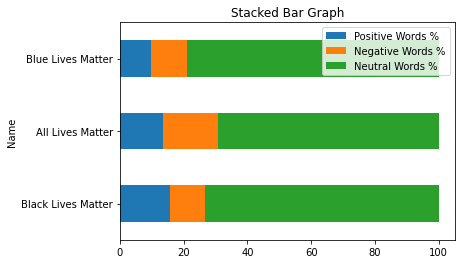

In [ ]:
# plot a Stacked Bar Chart using matplotlib 
final_df.plot( 
    x = 'Name', 
    kind = 'barh', 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True) 

print(final_df)

## Interpretation

**Write at least 1000 words explaining your interpretation/prediction and how/why your approach is an effective way to interpret/predict the cultural pattern that you identified. Include information on how the sign conventions you're studying are maintained and which cultural group(s) they are relevant to. 
In your explanation, identify at least one alternative interpretation for your cultural pattern, and explain using your data why your interpretation is superior. If you are predicting a cultural phenomenon, explain how the cultural phenomenon might be different from what you predict. What scenarios may cause your approach to fail?  
In your explanation, cite and summarize relevant Social Science theory from the course readings (at least 2 citations), as well as peer-reviewed sources that you have identified outside of the course (at least 6 citations) to support your interpretation/prediction
Successfully employ computational methods in order to make your interpretation and/or prediction** 

The aim of this research was to explore the different ways in which social media movements and countermovements employ language. As discussed in the previous section, du Gay et al. (2013) described how Language is a tool both for expression, as well as creation of culture and meaning. Peircean theory also discusses how language is often a signifier - objects don’t just represent their literal meaning, but in fact often act as signs that signify and represent an object (Peirce, 1955). This sign object relation can be interpreted. As described previously, social movement hashtags represent people’s beliefs, motivations, and behaviours as well. 
Thus, analysing the language used by different social media movements provides us with greater insight into the nature of the movement itself (representation, circuit of culture), as well as the beliefs of the individuals using the language (identity). Here we analyse twitter data - more specifically tweets containing hashtags for the social movement (#blacklivesmatter) and its anti movements (#bluelivesmatter and #alllivesmatter). We employ LDA based topic modelling, as well as dictionary based text analysis (testing for the prevalence and valence of power and rectitude words). 

The black lives matter topics seem to suggest three prominent topics in the tweets - one seems to provide information and description of events, one seems to be a call to action, and the last seems to be the most politically charged, and perhaps normative statements of what should happen. We interpret the first topic as an information topic based on research that shows that #blacklivesmatter tweets trend most right after incidents of police shooting black people (Pew Research Centre, 2020). For example, in 2020, a video of police murdering George Floyd went viral. This is perhaps why one of the top words is video, and another with murder. Other words like face and hear also seem to be linked with this video, as you could see George Floyd’s face and hear him ask for help (another word in this topic). Given that the largest surge in #blm tweets was after the george floyd shooting, it would make sense that these tweets discuss that. There are also words like “happen”, which once again suggests these sets of tweets describe what happened. In this way, our analysis echoes previous studies that show social media activism can be a way of providing information (Cox, 2017; Rezapour, 2018).  

The other topic seems to refer to call to action as it mentions protest, donate/donation, sign, “today” (#blm has been used to provide information about protest dates), support etc. Once again, this is commensurate with previous literature that has shown that social media movements are often used as calls to action, and contain information about the ways in which individuals can act online as well as offline (Segerberg & Bennett, 2015; Tufekci, 2017). Lastly, the third topic seems to be very politically charged and possibly contains ideological statements/opinions. It mentions protest again, but not as an informational call to action, but in a seemingly more ideological way, as it also mentions justice, need, country, change, murder, arrest, movement, etc. This is perhaps the subset of tweets where people share their opinions about the movement and shootings, with normative statements of what should happen. People often use social media movements to voice out their opinions and beliefs, as a way of generating awareness, showing solidarity, catharsis etc (Ince et al., 2017).  

The counter movements do not seem to follow this pattern. Rather than providing information or calls to action, they seem to be more opinion based. Interestingly, they also appear more divorced from the actual events (eg - the george floyd killing) and appear to be more ideologically oriented, especially all lives matter. This distance and divorcing from the events is something these movements - particularly all lives matter have criticised for (Carney, 2016). It is believed that all lives matter discussions can take away from the urgency and importance that the black lives matter movement demands, given the events during which it occurs (for example, taking action for george floyd’s death). 

The white lives matter movements seems to contain more general words. Interestingly, while it mentions support and movement, calls to action such as protest and donation are not prevalent here. Another interesting difference is that all lives matter used the words death, shoot, and kill, unlike black lives matter which mentioned “murder” very prominently along with kill, shoot, and death. Murder attributes more agency, and is a harsher word, which might reflect how all lives matter proponents have weaker objections to the situations. For some reason, there appears to be more profanity in this tag as well. One issue here is that some people used the #alllivesmatter tag to criticise the movement as well. It is not clear which set of tweets those are, although it appears possible that topic 3 represents the subset of individuals criticising all lives matter, or people who used both all lives and black lives matter tags, simply because the words of topic 3 are close to the words in the black lives matter tweet topics. 

Lastly, we come to the blue lives matter movement. Once again, the topics are not as distinct as they were for black lives matter tweets. It appears that almost all of them are defending cops, by mentioning words like honour, hero, thank, protect etc. One of the topics mentions duty, suspect, drug, dealer etc. which suggests that individuals are justifying the cops’ behaviour, by suggesting that the cops were only following their duty and were following up on drug suspicions. Unlike the all lives matter movement, blue lives matter seems to position itself in direct opposition to the black lives matter movement. This justification of police behaviour seems to be in line with social identity and system justification theories (Ellemers & Haslam, 2012; Jost et al., 2004). These theories suggest that when confronted with evidence that threatens a groups identity, individuals respond by becoming defensive, and advocating for the legitimacy of and providing justifications for the issues at hand. In this instance, george floyds murder prompted several discussions of unjustified white privilege, and racism against black americans, which threaten white group identity. Counter movements such as blue lives matter, exemplify these theories, as the content and existence of these movements demonstrate such defensive patterns of justification as well. 

This topic analysis provides an initial exploration of social movements. As we can see, the major arguments and points of discussion vary significantly across the movements. One might argue however, that looking at the combination of words is not sufficient to derive meaning regarding their usage. For example, specific words were punctuated with negation words, and it is difficult to know whether people were for or against certain stances. For example, how positive the sentiments for police were in alllivesmatter. However, here we can rely on surrounding words to provide context. For example, bluelivesmatter mentions hero and protect as additional words, which in the context of police can suggest more positive beliefs. However, black lives matter mentions murder. Additionally, this analysis allows us to see what people tend to focus on in their discussion. 

In order to standardise our analysis for comparison however, we will also explore a dictionary based analysis. The common category of these social media discussions, and perhaps the most relevant category involves the discussion of beliefs and ideologies in social movements (all three movements had this). Some prominent themes in such social movements are elements of power and morality. Power obviously is inextricably linked with discussions of race and racism, and morality surrounds the discussion of “what is right”, which is a central tenet of social movements. Here, we use the general inquirer dictionary to examine the prevalence of power and rectitude (morality) words in the tweets for the three movements.

Our first graph compares the distribution of power and morality words in the tweets. We find that the three movements focus roughly equally on discussions of morality. The focus on morality is much smaller, compared to the focus on power. Moreover, we find that blue lives matter has the greatest focus on power, and white lives matter has the least focus. This makes sense, since blue lives matter is focused on discussions of police officers and deputies - who possess power. All lives matter on the other hand appeared to be least politically radical, and most divorced from the situation at hand, which is why it perhaps contains the least power focused words. 

When looking at the amount of frequency of power words alone, we see that the percentage of black lives matter and blue lives matter tweets that contain only one power word are fairly similar. However, blue lives matter tweets seem to have far more tweets with multiple instances of power words. When comparing the valence of these power words however, we find that black lives matter movements employ more positive power words. Moreover, all lives matter tweets contain the most number of negatively associated power words. This shows that even though black lives matter movements have a greater power focus than all lives matter movement, the context of the power usage is more positive for black lives movement, whereas the all lives matter movement focuses on more negative power. There are no major differences in the morality of the tweets for the three movements. However, a study examined how moral values differ in these social movements, using the moral foundations theory, and found that #BlackLivesMatter  focused more on Care, Harm, Fairness, Loyalty, and Authority whereas #WhiteLivesMatter features Harm and Fairness most strongly (Rezapour et al., 2019). Thus, it is possible that these movements don't differ in moral focus, but rather on the kind of moral value they focus on.


## Conclusion

**Include a conclusion that summarizes your findings and explains their Social Science significance in the study of culture**

The aim of the present study was to examine the ways in which online social movements and countermovements employed language. Here, we analysed twitter data for the #blacklivesmatter movement, and its counter movements - #alllivesmatter and #bluelivesmatter. We conducted several text analysis and found that three movements differ in the kind of content they discuss. #Blacklivesmatter appears to be rooted in specific events. This movement is employed as a way of sharing information about incidents, calls to action (support, protest, donate), as well as ideological discussions and opinion sharing. Alllivesmatter and bluelivesmatter movements on the other hand are more removed from the event - especially allivesmatter - and focus more on opinions. Allivesmatter movement appears to be fairly removed from the specific events, and seems to have generalised discussions with less political language. Bluelivesmatter movement on the other hand seems to idealize cops and opposes the blacklivesmatter movement directly, by justifying events. We also find that these movements differ in their focus on power, as well as the ways in which they discuss power. This text analysis provides a preliminary investigation of the countermovement discourse, and the ways in which it contrasts with the actual social movement. Online social media activism is growing significantly, and is an important part of our culture. It is necessary to understand the ways in which social media movements function, in order to understand people's beliefs and actions. Research has also shown a strong positive association between online and offline activism, showing how participation in social media movements might predict real life behaviour (Greijdanus et al., 2015). This makes it especially important to study such online movements, as understanding people’s beliefs allows us to predict their behaviours. 


## Bibliography


* Carney, N. (2016). All Lives Matter, but so Does Race: Black Lives Matter and the Evolving Role of Social Media. Humanity & Society, 40(2), 180–199. https://doi.org/10.1177/0160597616643868
* Cox, J. M. (2017). The source of a movement: making the case for social media as an informational source using Black Lives Matter, Ethnic and Racial Studies, 40(11), 1847-1854, doi: 10.1080/01419870.2017.1334935
* Du Gay, P., Hall, S., Janes, L., Madsen, A., Mackay, H., & Negus, K. (2013). Doing cultural studies. Sage.
* Ellemers, N., & Haslam, S. A. (2012). Social identity theory. In P. A. M. Van Lange, A. W. Kruglanski, & E. T. Higgins (Eds.), Handbook of theories of social psychology (p. 379–398). Sage Publications Ltd. https://doi.org/10.4135/9781446249222.n45
* Greijdanus, H., de Matos Fernandes, C. A., Turner-Zwinkels, F., Honari, A., Roos, C. A., Rosenbusch, H., & Postmes, T. (2020). The psychology of online activism and social movements: relations between online and offline collective action. Current opinion in psychology, 35, 49–54. https://doi.org/10.1016/j.copsyc.2020.03.003
* Ince, J., Rojas, F., & Davis, C. A. (2017). The social media response to Black Lives Matter: How Twitter users interact with Black Lives Matter through hashtag use. Ethnic and Racial Studies, 40(11), 1814–1830. https://doi.org/10.1080/01419870.2017.1334931
* Jost, J. T., Banaji, M. R., & Nosek, B. A. (2004). A decade of system justification theory: Accumulated evidence of conscious and unconscious bolstering of the status quo. Political Psychology, 25, 881–919.
* Peirce, C. (1955). Logic as Semiotic: The Theory of Signs. In Philosophical Writings of Peirce (pp. 98-119). New York: Dover Publications inc.
* Pew Research Centre. (2020). Activism on social media varies by race and ethnicity, age, political party. Retrieved, from https://www.pewresearch.org/fact-tank/2020/07/13/activism-on-social-media-varies-by-race-and-ethnicity-age-political-party/
* Pew Research Centre. (2020). #BlackLivesMatter surges on Twitter after George Floyd’s death. Retrieved, from https://www.pewresearch.org/fact-tank/2020/06/10/blacklivesmatter-surges-on-twitter-after-george-floyds-death/
* Rezapour, R. (2018). Using Linguistic Cues for Analyzing Social Movements. arXiv preprint arXiv:1808.01742.
* Rezapour, R., Ferronato, P., & Diesner, J. (2019). How Do Moral Values Differ in Tweets on Social Movements?. New York: Association for Computing Machinery.
* Segerberg, A. & Bennett, W. L.. (2011). Social media and the organization of collective action: Using Twitter to explore the ecologies of two climate change protests. The Communication Review 14, 3 (2011), 197–215.
* Tufekci, Z.(2014). The medium and the movement: Digital tools, social movement politics, and the end of the free rider problem. Policy & Internet 6, 2 (2014), 202–208.
